In [18]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams
import PyFoam #TODO: plot density ratio on the diagram legend, not the variation
from matplotlib import lines
from matplotlib.lines import Line2D

rcParams['figure.dpi'] = 300


def plot_study(studyName):

    lStyles = list(lines.lineStyles.keys())
    mStyles = list(Line2D.markers.keys())


    studyDirs = [directory for directory in os.listdir(os.curdir) \
                 if os.path.isdir(directory) and studyName in directory] 

    studyDirs.sort()

    studyFileName = "stationaryDropletResults.csv"
    studyFilePaths = [(i, os.path.join(studyDir, studyFileName)) for i,studyDir in enumerate(studyDirs) \
                      if os.path.exists(os.path.join(studyDir,studyFileName))]

    studyDframeTuples = [(i, pd.read_csv(studyFilePath)) for i,studyFilePath in studyFilePaths]

    fig, ax = plt.subplots()
    ax.set_yscale('symlog')

    for i,studyDframeTuple in enumerate(studyDframeTuples):
        time  = studyDframeTuple[1]['time']
        error = studyDframeTuple[1]['Linf velocity error']
        caseName = studyDirs[studyDframeTuple[0]]
        ax.plot(time, error, linestyle=lStyles[i % len(lStyles)], 
                marker=mStyles[i % len(mStyles)], label=caseName) 
    
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),fancybox=True, shadow=True, ncol=1)
    plt.show()

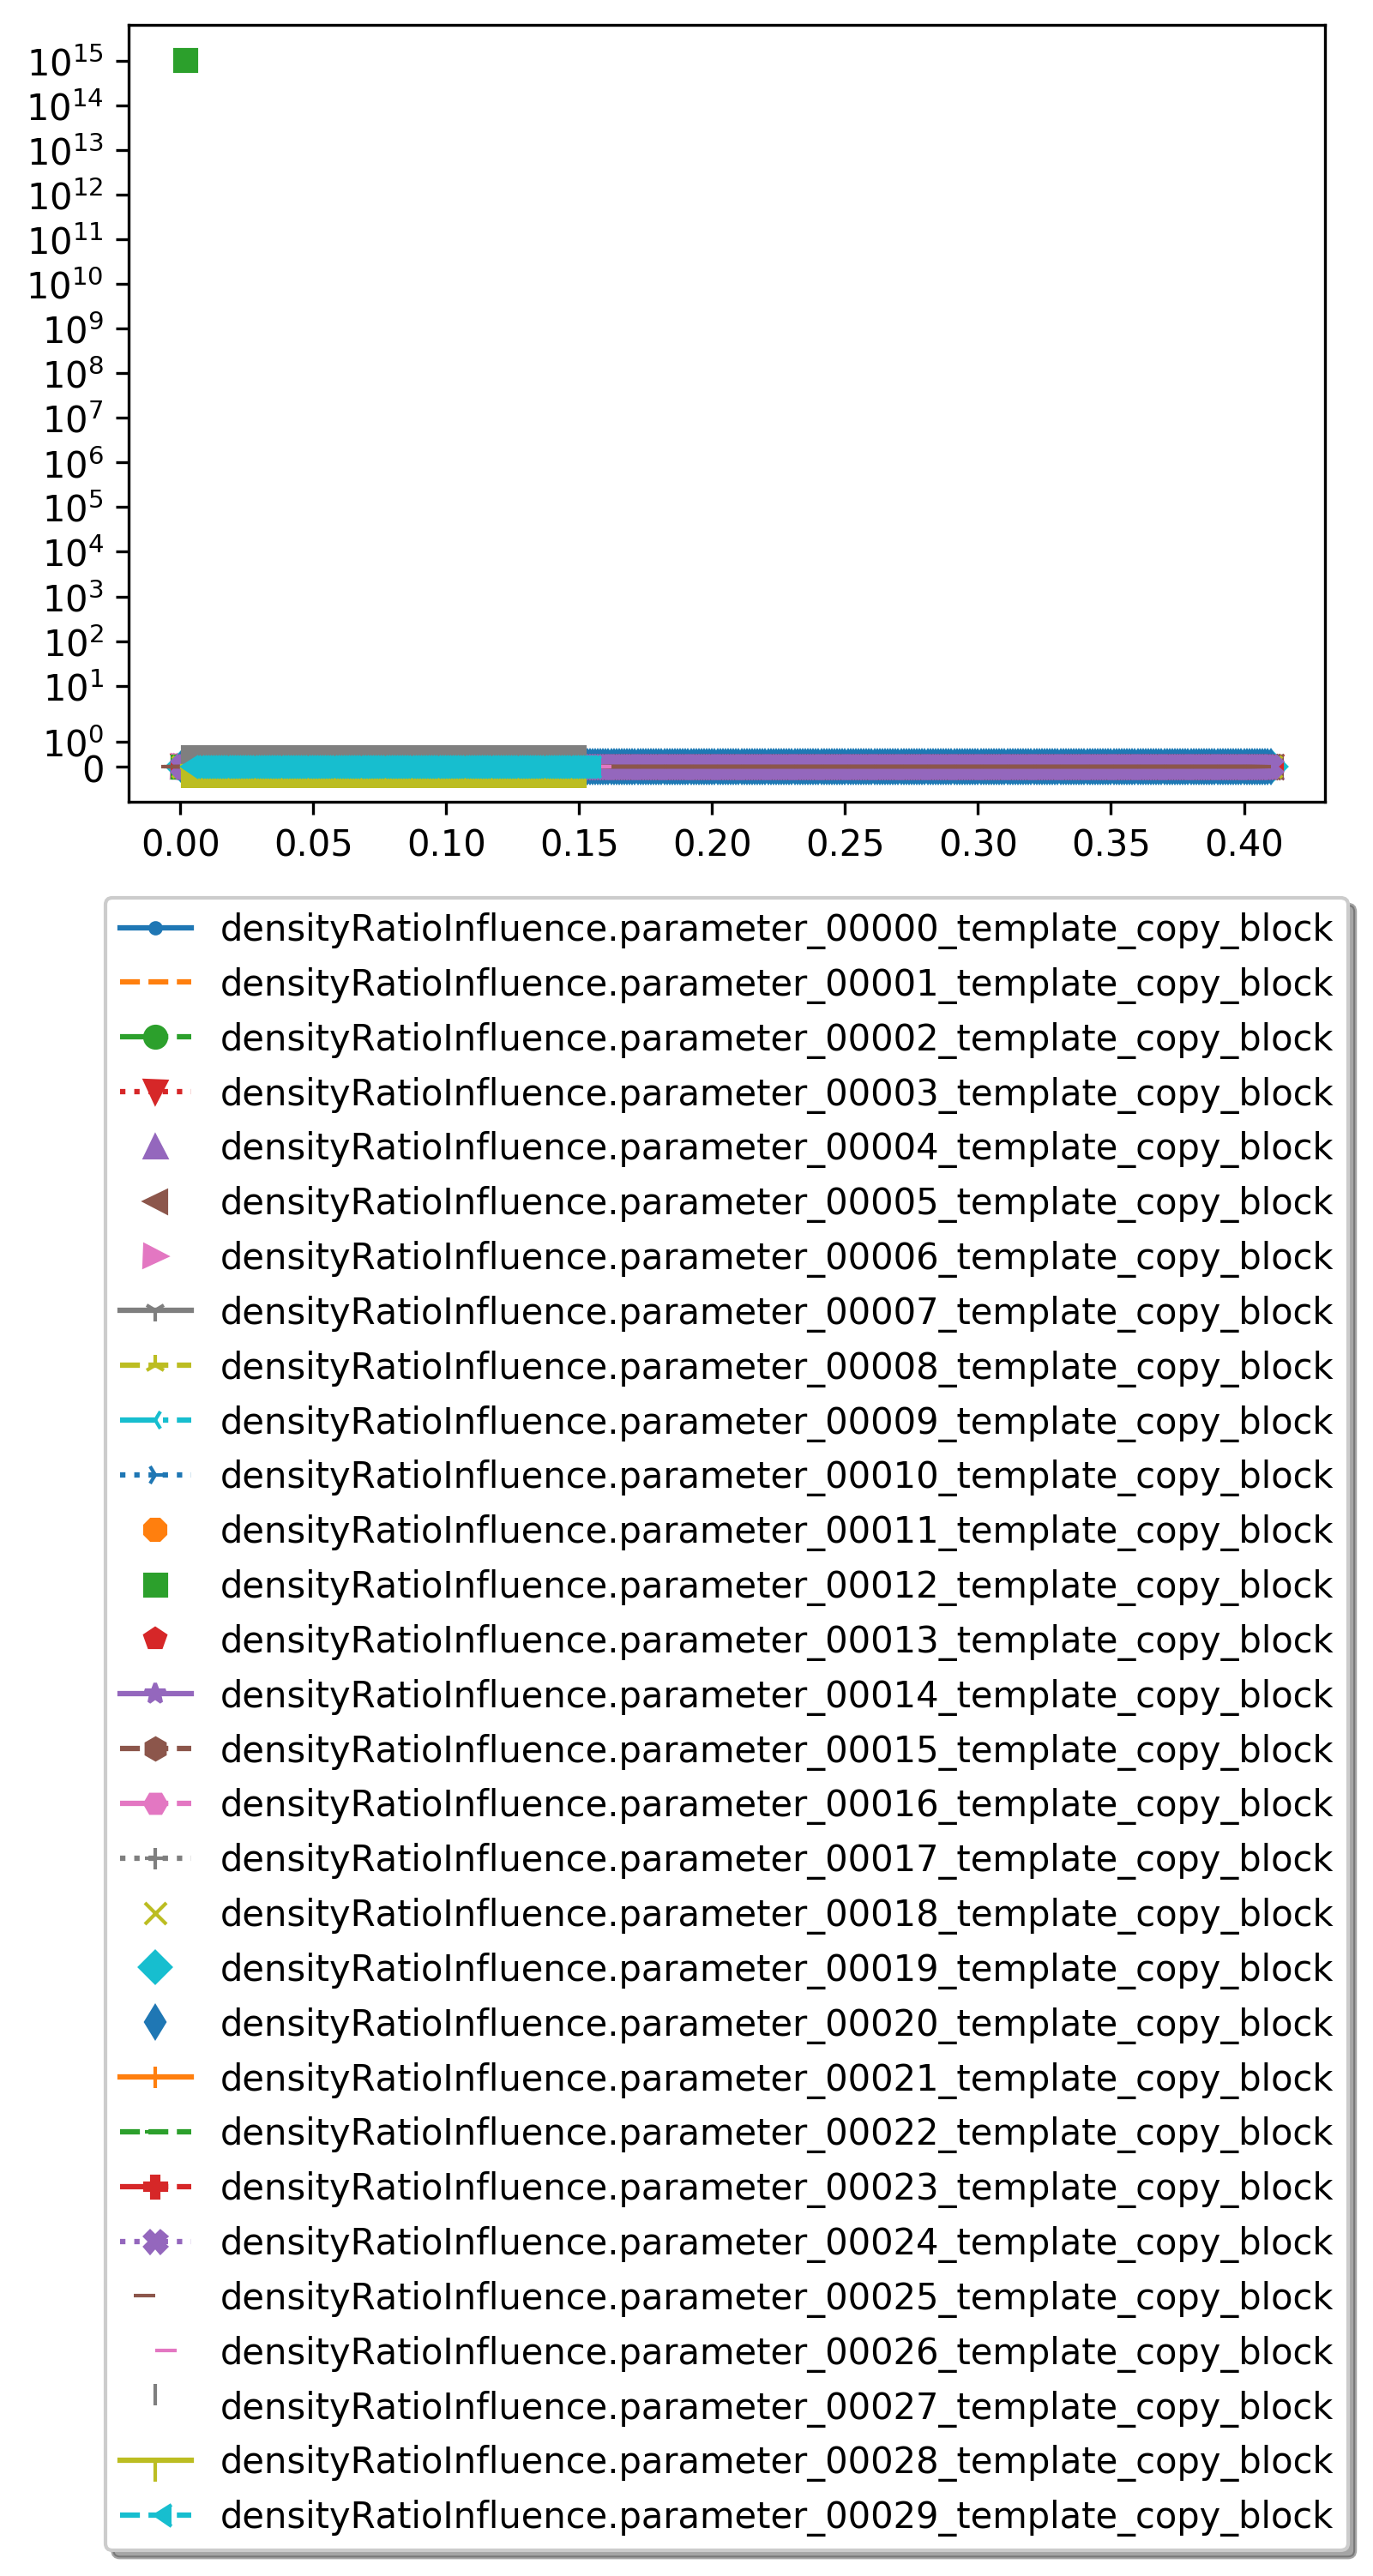

In [19]:
plot_study("densityRatioInfluence.parameter_00")